In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import random

In [3]:
L = []
for i in range(10000):
    L.append(random.randint(1,6))



In [4]:
len(L)

10000

In [5]:
L[:5]

[2, 4, 4, 3, 3]

In [6]:
# pmf

In [7]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()
s

1    0.1664
2    0.1686
3    0.1657
4    0.1682
5    0.1649
6    0.1662
dtype: float64

<AxesSubplot:>

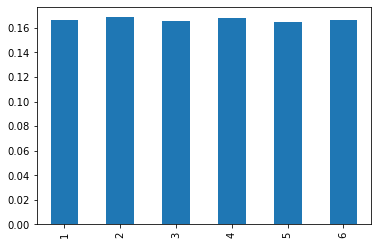

In [8]:
s.plot(kind='bar')

In [9]:
# for two dice
L = []
for i in range(10000):
  a = random.randint(1,6)
  b = random.randint(1,6)

  L.append(a + b)

In [10]:
len(L)

10000

In [11]:
L[:5]

[6, 9, 12, 4, 7]

In [12]:
s1 = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()


<AxesSubplot:>

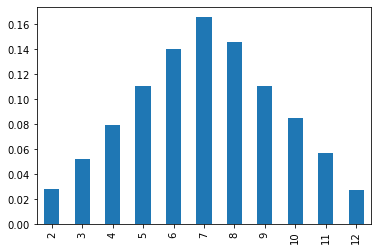

In [13]:
s1.plot(kind='bar')

In [14]:
# Cumulative Distribution Function(CDF) of PMF

In [15]:
import numpy as np
np.cumsum(s1)

2     0.0279
3     0.0798
4     0.1589
5     0.2691
6     0.4091
7     0.5747
8     0.7205
9     0.8308
10    0.9158
11    0.9724
12    1.0000
dtype: float64

<AxesSubplot:>

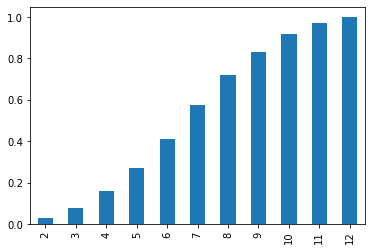

In [16]:
np.cumsum(s1).plot(kind='bar')

In [17]:
# Parametric Density Estimation

In [18]:
from numpy.random import normal
sample = normal(loc=50,scale=5,size=1000)

In [19]:
sample

array([53.177351  , 52.64593453, 36.07172888, 50.18435476, 50.21731661,
       52.42084227, 43.83242165, 55.41727314, 37.52004044, 45.63841756,
       47.54341139, 51.69644102, 48.45486665, 53.14859602, 46.86024269,
       48.78234837, 52.86379515, 53.87886905, 50.96693117, 58.46469444,
       47.16258314, 54.16145872, 46.08046279, 43.01854353, 45.024953  ,
       48.74778604, 48.80869333, 45.74199827, 46.78966367, 46.05829899,
       45.72063759, 50.23469426, 55.72607846, 52.46446398, 47.5281877 ,
       58.90910929, 38.66279244, 47.13338128, 51.29196521, 54.96783508,
       48.13970811, 45.99514441, 55.74444888, 45.43704565, 51.07722322,
       45.03046854, 41.81826834, 58.18727856, 54.41570771, 52.580657  ,
       45.55973302, 59.47837065, 48.4837589 , 54.23653795, 50.69568475,
       59.67573075, 53.14843683, 54.55308407, 45.74627812, 58.49907364,
       52.88917843, 53.21854715, 44.64922013, 46.80076577, 47.64532012,
       54.65739066, 60.82613183, 50.75151198, 44.70485483, 52.78

(array([  5.,  28.,  70., 182., 225., 228., 157.,  79.,  18.,   8.]),
 array([34.27752609, 37.44720239, 40.61687869, 43.78655499, 46.95623129,
        50.12590759, 53.29558389, 56.46526019, 59.63493649, 62.80461279,
        65.97428909]),
 <BarContainer object of 10 artists>)

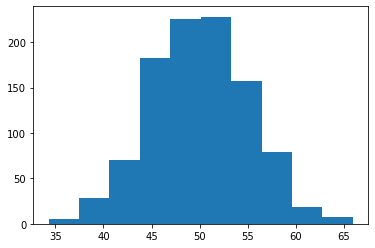

In [20]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [21]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [22]:
# fit the distribution with the above parameters
from scipy.stats import norm 
dist = norm(sample_mean,sample_std)

In [23]:
values = np.linspace(sample.min(),sample.max(),100)

In [24]:
sample.max()

65.97428909448449

In [25]:
probabilities = [dist.pdf(value) for value in values]

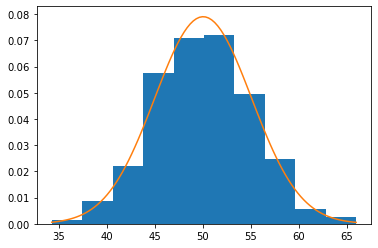

In [26]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

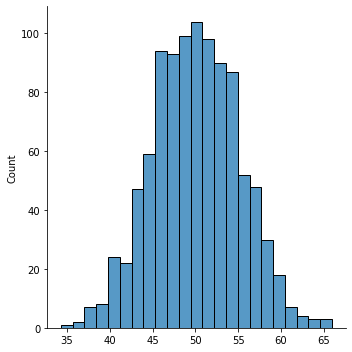

In [27]:
sns.displot(sample)

In [28]:
#  KDE

In [29]:
sample1 = normal(loc=20,scale=5,size=300)
sample2 = normal(loc=40,scale=5,size=700)
sample = np.hstack((sample1,sample2))



In [30]:
sample

array([22.75184494, 15.68658483, 20.80466475, 24.50709292, 26.04130351,
       31.63607137, 23.56809778, 16.22907987, 18.25160572, 16.87074951,
       25.50999049, 18.16717155, 12.77034689, 21.56391533, 16.90258308,
       30.34699592, 10.71220931, 18.34276869, 22.49101355, 18.71733913,
       12.12397522, 23.59751007,  9.44974099, 25.59096381, 25.79741039,
       23.30617008, 26.20350249, 23.96662071, 17.69385761, 24.44596432,
       18.96709415, 16.89206025,  8.55731628, 27.74946907, 12.46679909,
       18.94725268, 28.50539187, 18.36222763, 14.83001594,  2.87565192,
       22.17205279, 10.90470489, 15.41366843, 22.17440336, 20.89614353,
       23.7882931 , 25.96709665, 28.02160653, 16.88269474, 20.69453291,
       20.36136314, 12.78404625, 21.85088714, 18.33377152, 15.63853374,
       16.73745417, 29.67538162, 18.30654824, 20.3972994 , 15.55669861,
       26.43108421, 15.87841882, 16.4022045 , 21.18964781, 20.60517608,
       27.78890541, 34.71670762, 26.82591639, 18.71885508, 25.64

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  2.,  5.,  4.,  9., 10., 13., 24.,
        24., 12., 29., 31., 23., 25., 12., 19., 12., 21., 12.,  9.,  7.,
        11., 14.,  7., 24., 25., 32., 29., 46., 55., 57., 54., 54., 52.,
        51., 45., 33., 32., 25., 22., 11.,  6.,  3.,  4.,  3.]),
 array([ 2.87565192,  3.88930539,  4.90295885,  5.91661232,  6.93026578,
         7.94391925,  8.95757271,  9.97122617, 10.98487964, 11.9985331 ,
        13.01218657, 14.02584003, 15.0394935 , 16.05314696, 17.06680043,
        18.08045389, 19.09410735, 20.10776082, 21.12141428, 22.13506775,
        23.14872121, 24.16237468, 25.17602814, 26.18968161, 27.20333507,
        28.21698854, 29.230642  , 30.24429546, 31.25794893, 32.27160239,
        33.28525586, 34.29890932, 35.31256279, 36.32621625, 37.33986972,
        38.35352318, 39.36717664, 40.38083011, 41.39448357, 42.40813704,
        43.4217905 , 44.43544397, 45.44909743, 46.4627509 , 47.47640436,
        48.49005782, 49.50371129, 50.51736475, 51.53101822,

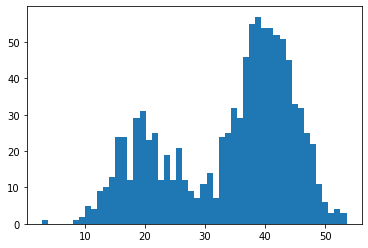

In [31]:
# plot histogram bins = 50
plt.hist(sample,bins=50)

In [32]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=5)

In [33]:
values = np.linspace(sample.min(),sample.max(),100)

values = values.reshape((len(values), 1))

In [34]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

`score_samples(values)` returns the log-density estimate of the input samples values. This is because the `score_samples()` method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

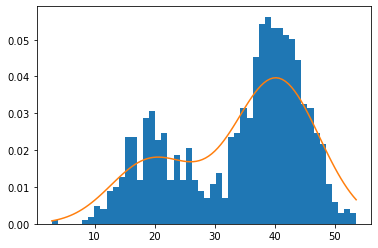

In [35]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<AxesSubplot:ylabel='Density'>

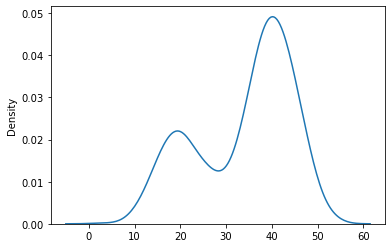

In [36]:
sns.kdeplot(sample.reshape(1000),bw_adjust=1)

<AxesSubplot:ylabel='Density'>

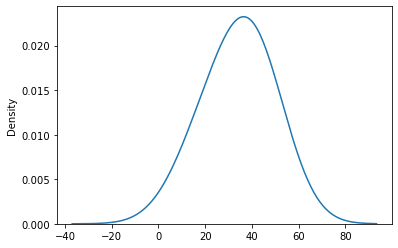

In [37]:
sns.kdeplot(sample.reshape(1000),bw_adjust=5)


<AxesSubplot:ylabel='Density'>

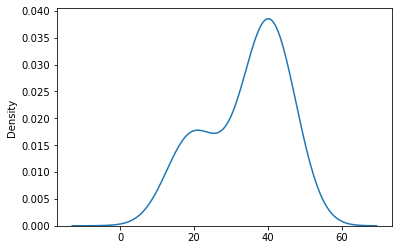

In [38]:
sns.kdeplot(sample.reshape(1000),bw_adjust=2)


In [49]:
# how to use PDF in Data science

In [39]:
iris = sns.load_dataset('iris')

In [40]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

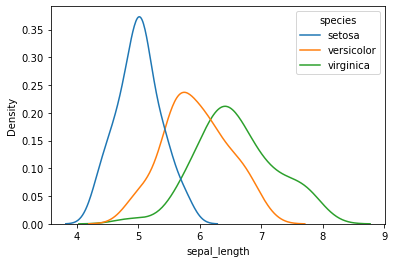

In [41]:
sns.kdeplot(data=iris,x='sepal_length',hue='species')

<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

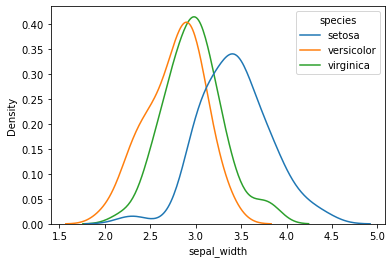

In [42]:
sns.kdeplot(data=iris,x='sepal_width',hue='species')


<AxesSubplot:xlabel='petal_length', ylabel='Density'>

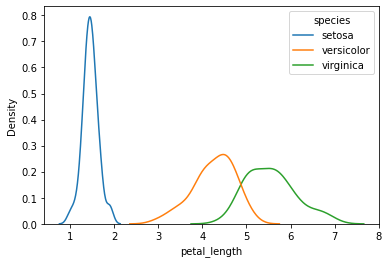

In [43]:
sns.kdeplot(data=iris,x='petal_length',hue='species')


<AxesSubplot:xlabel='petal_width', ylabel='Density'>

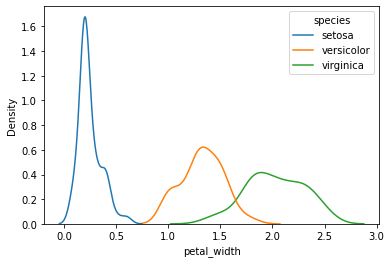

In [44]:
sns.kdeplot(data=iris,x='petal_width',hue='species')


In [46]:
titanic =sns.load_dataset('titanic')

In [47]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='age', ylabel='Density'>

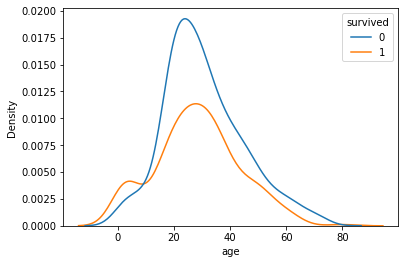

In [48]:
sns.kdeplot(data=titanic,x='age',hue='survived')


In [ ]:
# how to use CDF in Data science

<AxesSubplot:xlabel='petal_width', ylabel='Density'>

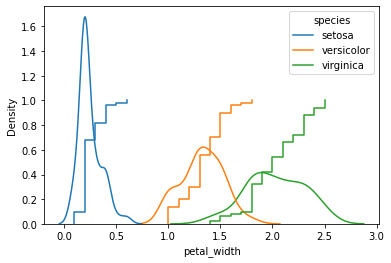

In [50]:
sns.kdeplot(data=iris,x='petal_width',hue='species')
sns.ecdfplot(data=iris,x='petal_width',hue='species')




In [51]:
# 2D Density Plots

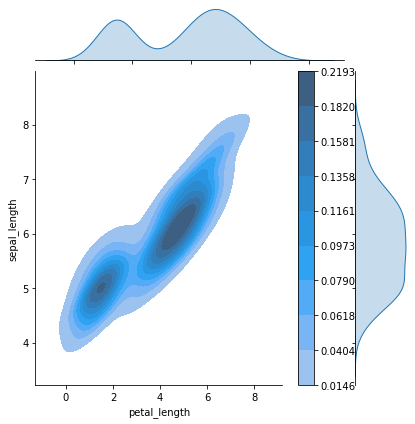

In [53]:
sns.jointplot(data=iris,x='petal_length',y='sepal_length',kind='kde',fill=True,cbar=True)